In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [2]:
from sklearn import metrics
def print_metrics(pred, y_vals):
    print('mape: ', metrics.mean_absolute_percentage_error(y_vals, pred))
    print('mae: ', metrics.mean_absolute_error(y_vals, pred))
    print('mse: ', metrics.mean_squared_error(y_vals, pred))
    print('rmse: ', np.sqrt(metrics.mean_squared_error(y_vals, pred)))
    print('r2: ', metrics.r2_score(y_vals, pred))
    count = 0
    y_error = pred.flatten() - y_vals.flatten()
    y_error = np.array([abs(e) for e in y_error]).flatten()
    for i in range(len(y_error)):
        if(y_error[i] < 0.15 * y_vals[i]):
            count += 1
    print('15% 准确度: ', count / len(pred))

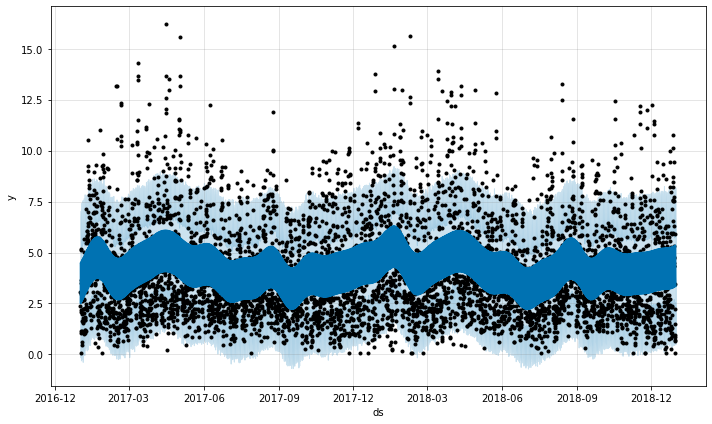

In [3]:
from prophet import Prophet
split_line=5828
df = pd.DataFrame(data['ds'][:split_line])
df['y'] = data['wind'][:split_line]
m = Prophet(changepoint_prior_scale=1.0, seasonality_prior_scale=0.1, seasonality_mode='additive', changepoint_range=1, daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=4, freq='3H')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.savefig("prophet_wind.pdf")

In [4]:
print_metrics(forecast['yhat'][:split_line].to_numpy(), data['wind'][:split_line].to_numpy())

mape:  0.8289075889803507
mae:  1.678952739133633
mse:  4.718201397731412
rmse:  2.1721421218998107
r2:  0.15118294522382347
15% 准确度:  0.21619766643788607


In [5]:
print_metrics(forecast['yhat'][split_line:].to_numpy(), data['wind'][split_line:].to_numpy())

mape:  0.7598922639740788
mae:  1.5475491848636223
mse:  2.4874145672642705
rmse:  1.5771539453281884
r2:  -14.405375187497217
15% 准确度:  0.0


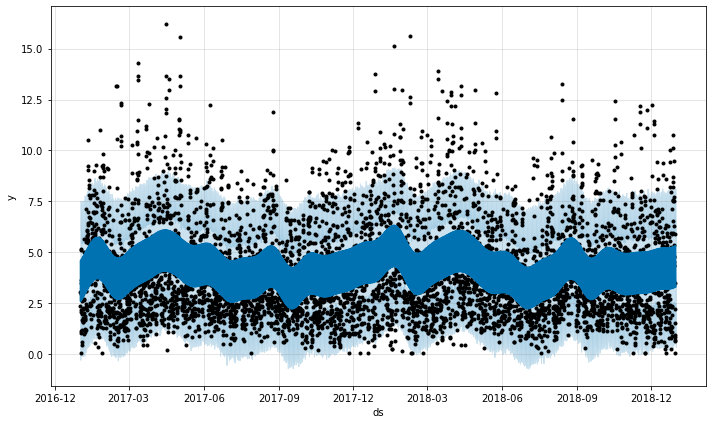

In [6]:
data = pd.read_csv('data_decomposed.csv')
df = pd.DataFrame(data['ds'][:split_line])
df['y'] = data['wind'][:split_line]
m = Prophet(changepoint_prior_scale=1.0, seasonality_prior_scale=0.1, seasonality_mode='additive', changepoint_range=1, daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=4, freq='3H')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.savefig("prophet_wind_decomposed.pdf")

In [7]:
print_metrics(forecast['yhat'][:split_line].to_numpy(), data['wind'][:split_line].to_numpy())

mape:  0.8292919238503899
mae:  1.6796002700190018
mse:  4.720638008790736
rmse:  2.172702926953139
r2:  0.15074459237521376
15% 准确度:  0.2158544955387783


In [8]:
print_metrics(forecast['yhat'][split_line:].to_numpy(), data['wind'][split_line:].to_numpy())

mape:  0.739607720394934
mae:  1.5054396803802863
mse:  2.358876271572838
rmse:  1.5358633635753012
r2:  -13.609295315187952
15% 准确度:  0.0
